Preparing 

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import pickle
import random
from tqdm import tqdm

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


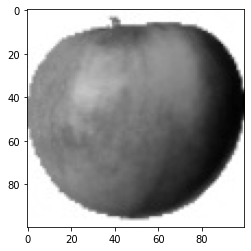

In [64]:
datadir_training = "../Fruits_Classification_Project/data/Training"
datadir_testing = "../Fruits_Classification_Project/data/Testing"
categories = ["Apple Red 2", "Avocado","Blueberry", "Cherry 2","Dragon Fruit","Guava","Kiwi","Lemon", "Litchi", "Orange","Pear","Pepper Yellow", "Pineapple" ,"Star Fruit", "Strawberry"]
IMG_SIZE = 100
# # get one picture in data
for category in categories:
  path = os.path.join(datadir_training,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    print(new_array)
    plt.imshow(new_array, cmap = 'gray')
    plt.show()
    break
  break

In [65]:
categories = ["Apple Red 2", "Avocado","Blueberry", "Cherry 2","Dragon Fruit","Guava"
              ,"Kiwi","Lemon", "Litchi", "Orange","Pear","Pepper Yellow", 
              "Pineapple" ,"Star Fruit", "Strawberry"]
IMG_SIZE = 100
#Create_training_data
training_data = []
testing_data = []

def create_training_data():
    for category in categories:  

        path = os.path.join(datadir_training,category)  
        class_num = categories.index(category)  

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass

def create_testing_data():
    for category in categories:  

        path = os.path.join(datadir_testing,category)  
        class_num = categories.index(category)  

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                testing_data.append([new_array, class_num])  
            except Exception as e:  
                pass
create_training_data()
create_testing_data()

print(len(training_data))
print(len(testing_data))

100%|██████████| 164/164 [00:00<00:00, 241.11it/s]

7656
2567


12
3
2
6
6
10
0
5
9
4
12
3
3
3
14


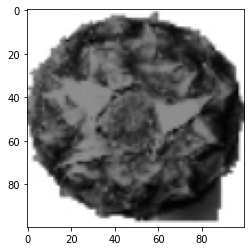

In [66]:
#random selection of data in training_data to check

random.shuffle(training_data)
sample = training_data[0]
plt.imshow(sample[0], cmap='gray')
for sample in training_data[:15]:
    print(sample[1])



In [67]:
# saving (x: picture), (y: label)

x_training = []
y_training = []
x_testing = []
y_testing = []

for features,label in training_data:
    x_training.append(features)
    y_training.append(label)
x_training = np.array(x_training).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_training = np.array(y_training)

for features,label in testing_data:
    x_testing.append(features)
    y_testing.append(label)
x_testing = np.array(x_testing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_testing = np.array(y_testing)

print('x:',x_testing)
print('y:',y_testing)

x: [[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]


 [[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]


 [[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]


In [68]:
#Lưu x,y training data 
pickle_out = open("../Fruits_Classification_Project/Save/x_training.pickle","wb")
pickle.dump(x_training, pickle_out)
pickle_out.close()

pickle_out = open("../Fruits_Classification_Project/Save/y_training.pickle","wb")
pickle.dump(y_training, pickle_out)
pickle_out.close()

#Lưu x,y testing data 
pickle_out = open("../Fruits_Classification_Project/Save/x_testing.pickle","wb")
pickle.dump(x_testing, pickle_out)
pickle_out.close()

pickle_out = open("../Fruits_Classification_Project/Save/y_testing.pickle","wb")
pickle.dump(y_testing, pickle_out)
pickle_out.close()

Build model

In [69]:
import keras
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPool2D, Conv2D
from keras.utils import np_utils

In [70]:
#Training
pickle_in = open("../Fruits_Classification_Project/Save/x_training.pickle","rb")
X_training = pickle.load(pickle_in)
pickle_in = open("../Fruits_Classification_Project/Save/y_training.pickle","rb")
y_training = pickle.load(pickle_in)

X_training = X_training/255.0

#Testing
pickle_in = open("../Fruits_Classification_Project/Save/x_testing.pickle","rb")
X_testing = pickle.load(pickle_in)
pickle_in = open("../Fruits_Classification_Project/Save/y_testing.pickle","rb")
y_testing = pickle.load(pickle_in)

X_testing = X_testing/255.0

print('X:',X_testing)
print('y:',y_testing)

X: [[[[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  ...

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]]


 [[[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  ...

  [[1.        ]
   [1.        ]
   [

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


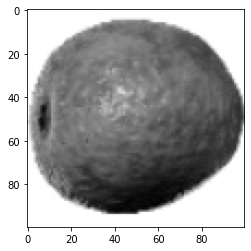

In [71]:
num_classes = 15
#One hot encoding Y
Y_training = np_utils.to_categorical(y_training,15)
Y_testing = np_utils.to_categorical(y_testing,15)
print("Dữ liệu y ban đầu ", y_training[7])
print("Dữ liệu y sau one-hot encoding ", Y_training[7])
plt.imshow(np.squeeze(X_training[7].reshape(100,100,1)), cmap = 'gray')

In [72]:
name = 'fruits_classifer_model'
model = Sequential()

#layer1
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm relu làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32,(3,3), padding='same', activation = 'relu', input_shape = (100,100,1)))
model.add(MaxPool2D(pool_size = (2,2)))

#layer2
# Thêm Convolutional layer với 64 kernel
model.add(Conv2D(64,(3,3),padding='same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

#layer3
# Thêm Convolutional layer với 128 kernel
model.add(Conv2D(128,(3,3),padding='same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

#FCN layer
# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())
# Thêm Fully Connected layer với 128 nodes và dùng hàm relu
model.add(Dense(128, activation = 'relu'))
# Output layer với 15 node và dùng softmax function để chuyển sang xác xuất
model.add(Dense(15))
model.add(Activation('softmax'))

# Compile model, hàm loss_function categorical_crossentropy
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Thực hiện train model với data
#batch_size: số lượng mẫu dữ liệu trong 1 lần huấn luyện.
H = model.fit(X_training, Y_training, batch_size = 16, epochs = 10, verbose = 1, validation_split = 0.2)

Epoch 1/10
383/383 [==============================] - 75s 192ms/step - loss: 0.3863 - accuracy: 0.8821 - val_loss: 0.0282 - val_accuracy: 0.9974
Epoch 2/10
383/383 [==============================] - 71s 186ms/step - loss: 0.0240 - accuracy: 0.9953 - val_loss: 6.0262e-04 - val_accuracy: 1.0000
Epoch 3/10
383/383 [==============================] - 72s 189ms/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 2.0353e-04 - val_accuracy: 1.0000
Epoch 4/10
383/383 [==============================] - 81s 212ms/step - loss: 9.6675e-05 - accuracy: 1.0000 - val_loss: 7.2601e-05 - val_accuracy: 1.0000
Epoch 5/10
383/383 [==============================] - 76s 198ms/step - loss: 4.5986e-05 - accuracy: 1.0000 - val_loss: 4.4456e-05 - val_accuracy: 1.0000
Epoch 6/10
383/383 [==============================] - 74s 193ms/step - loss: 2.8939e-05 - accuracy: 1.0000 - val_loss: 3.0812e-05 - val_accuracy: 1.0000
Epoch 7/10
383/383 [==============================] - 72s 189ms/step - loss: 2.0078e-05 - accuracy

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0

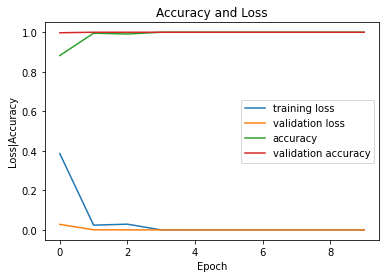

In [73]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()
model.summary()

In [74]:
#Save model to drive
model.save('../Fruits_Classification_Project/Save/Fruits_Classification.model')

INFO:tensorflow:Assets written to: ../Fruits_Classification_Project/Save/Fruits_Classification.model\assets


INFO:tensorflow:Assets written to: ../Fruits_Classification_Project/Save/Fruits_Classification.model\assets


In [75]:
# Đánh giá model với dữ liệu test set
score = model.evaluate(X_testing, Y_testing, verbose=0)
print(score)

[0.20577102899551392, 0.972730815410614]


Test_Model

In [2]:
import tensorflow as tf
from keras.preprocessing import image
from keras.models import load_model

In [3]:
#Load model from drive
model = load_model('../Fruits_Classification_Project/Save/Fruits_Classification.model')

#Check model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0

In [46]:
#select link drive of image to test
img_test = '../Fruits_Classification_Project/data/test/dragon2.jpg'

#process image before classification

categories = ["Apple Red 2", "Avocado","Blueberry", "Cherry 2",
              "Dragon Fruit","Guava","Kiwi","Lemon", "Litchi",
              "Orange","Pear","Pepper Yellow", "Pineapple" ,"Strawberry"]
def prepare(filepath):
  IMG_SIZE = 100
  img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array, (100,100))
  new_array = new_array/255.0
  return new_array.reshape(-1,100,100,1)

#show processing image
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()
print('Show processing image')


UnboundLocalError: local variable 'new_array' referenced before assignment

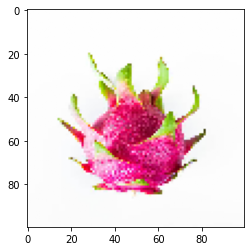

1/1 [==============================] - 0s 27ms/step
[[6.8088398e-35 0.0000000e+00 3.5979487e-32 4.0535460e-25 6.9913481e-19
  5.2689557e-20 9.1875236e-29 9.3980804e-22 7.6296167e-19 0.0000000e+00
  9.6649716e-24 8.2672957e-17 6.3771734e-17 1.0000000e+00 1.1623884e-33]]
Predicted value: 13
Name of fruit: Strawberry
Prediction: 1.0


In [45]:
#create color image to show when classify object

img1 = tf.keras.utils.load_img(img_test, target_size=(100, 100))
img1_tensor = tf.keras.utils.img_to_array(img1)
img1_tensor = np.expand_dims(img1_tensor, axis=0)
img1_tensor /= 255.0

#classify object
plt.imshow(np.squeeze(img1_tensor))
plt.show()

prediction = model.predict([prepare(img_test)])
print(prediction)
print('Predicted value: ' + str(np.argmax(prediction)))
print('Name of fruit: ' + str(categories[int(np.argmax(prediction))]))
print('Prediction: ' + str(np.max(prediction)))
